# TP Movies

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno # pip install missingno (Il faut installer le package dans l'environnement python)

### 1. Chargement des données

In [157]:
df = pd.read_csv("../../data/movies.csv",low_memory=False)
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


### 2. Nettoyage des données

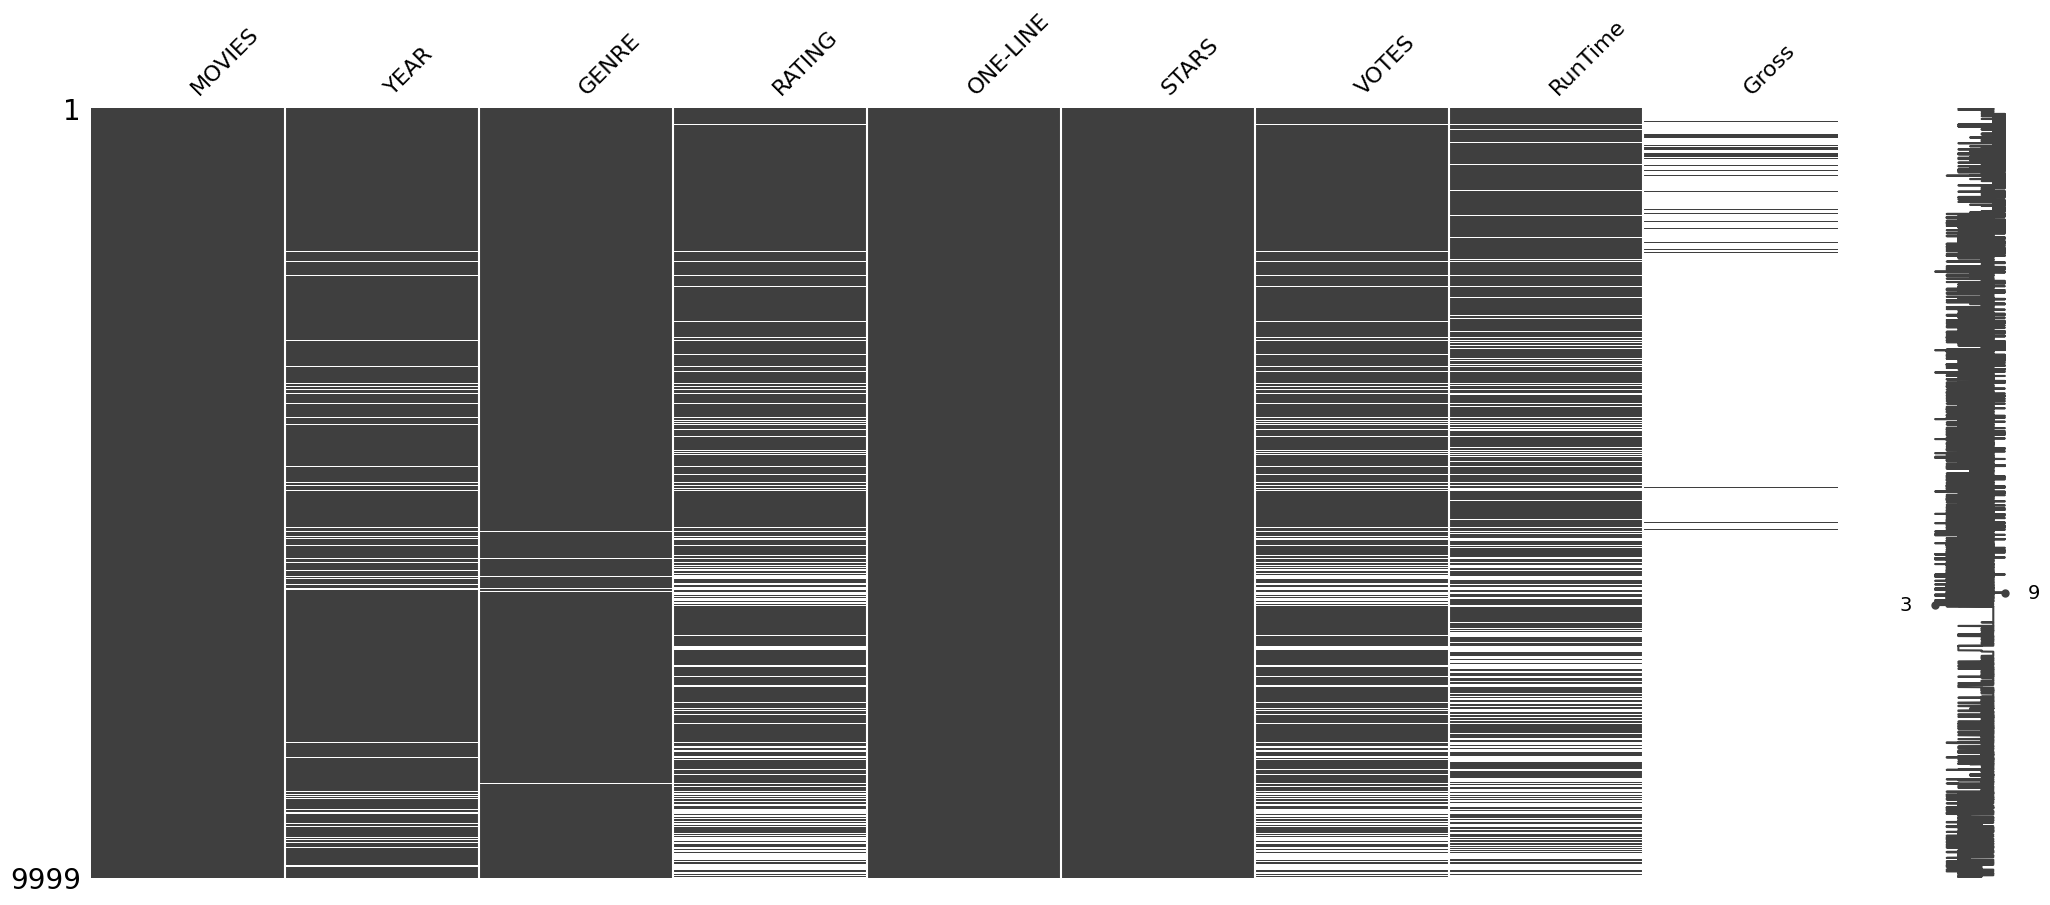

<Figure size 1500x900 with 0 Axes>

In [159]:
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

<Axes: >

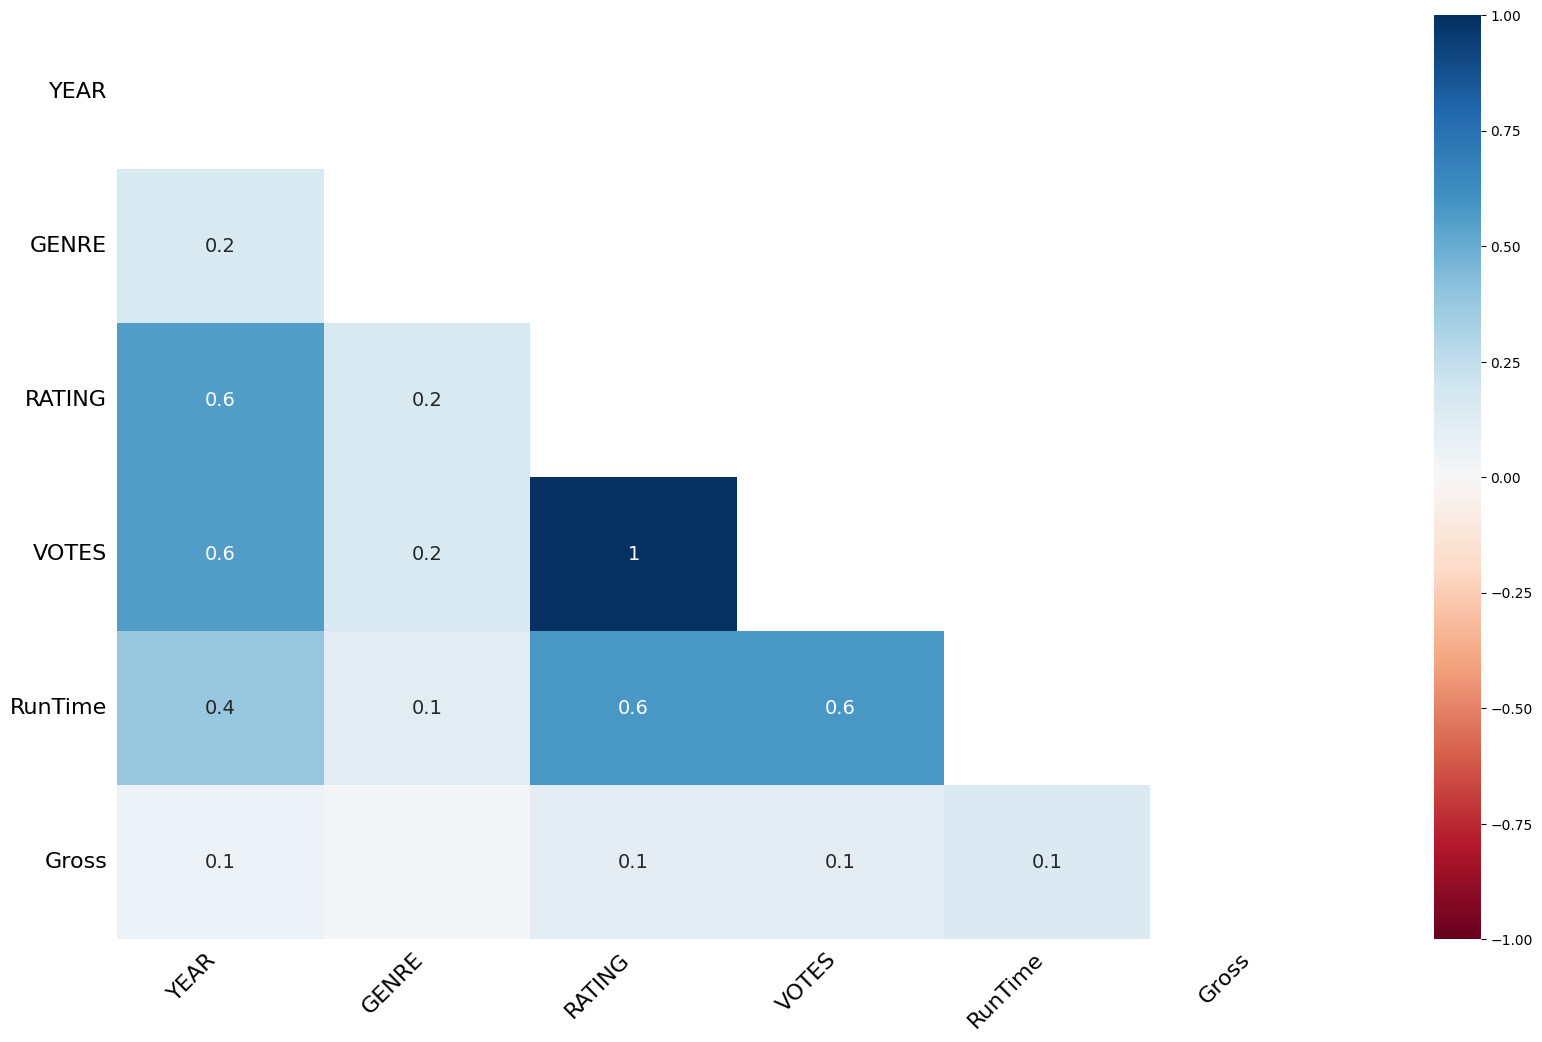

In [160]:
msno.heatmap(df, labels = True)


<Axes: >

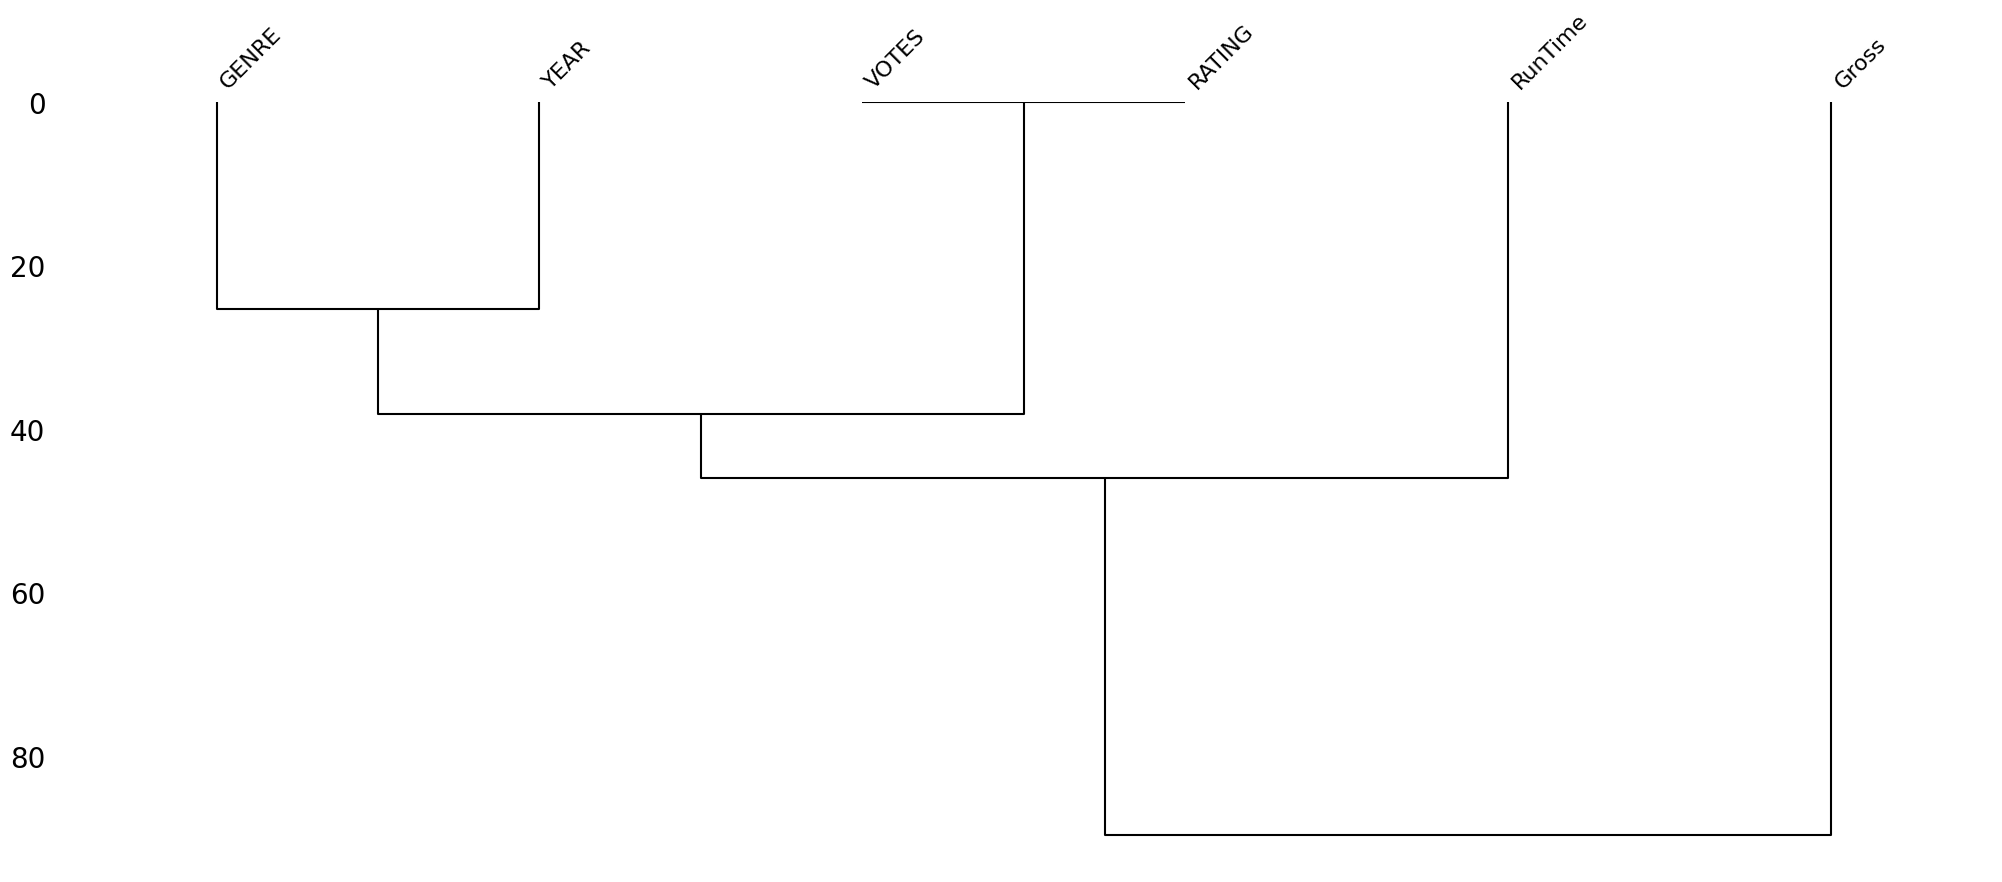

In [161]:
# Columns having missing values
missing_value_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
msno.dendrogram(df[missing_value_columns])

In [162]:
def get_numerical_summary(df):
    total = df.shape[0]
    missing_values_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_values_percent = {}
    for col in missing_values_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_values_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_values_percent

# method sum all missing values
def get_all_missing_values(df):
    total = 0
    for col in df.columns:
        total += df[col].isnull().sum()

    print("\nTotal Missing Values : {}".format(total))
    return total



In [163]:
missing_percent = get_numerical_summary(df)

YEAR : 644 (6.441%)
GENRE : 80 (0.8%)
RATING : 1820 (18.202%)
VOTES : 1820 (18.202%)
RunTime : 2958 (29.583%)
Gross : 9539 (95.4%)


#### Suppression des données

Pour la suppression des données nous avons choisi la suppression des attributs

Le Threshold choisit est de 25% donc les attributs ayant plus de 25% de valeurs manquantes seront supprimés (Runtime et Gross) 

In [164]:
# Seuil pour supprimer l'attribut dont les valeurs manquantes sont supérieures au seuil.
ATTRIBUTE_THRESHOLD = 30  #30% in this case 

for col, per in missing_percent.items():
    if per > ATTRIBUTE_THRESHOLD:
        df.drop(col, axis=1, inplace=True)
_ = get_numerical_summary(df)


YEAR : 644 (6.441%)
GENRE : 80 (0.8%)
RATING : 1820 (18.202%)
VOTES : 1820 (18.202%)
RunTime : 2958 (29.583%)


On supprime les films sans vote et par extention ces sans rating pour ne pas fausserr la moyenne des rating avec des valeur générées dans vote 

In [165]:
import numpy as np
for idx in range(df.shape[0]):
    if pd.isnull(df.loc[idx, 'RunTime']):
        # Genrate a random value between 90 and 120
        df.loc[idx, 'RunTime'] = np.random.randint(90, 120)
    if pd.isnull(df.loc[idx, 'GENRE']):
        # Genrate a random value between 90 and 120
        df.drop(idx, axis=0, inplace=True)
        continue
    if pd.isnull(df.loc[idx, 'VOTES']):
        # Remove the row
        df.drop(idx, axis=0, inplace=True)
    

In [166]:
# Show nb rows and columns
print("Rows : ", df.shape[0])

Rows :  8168


# Test du dataset

In [167]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0


In [168]:
_ = get_numerical_summary(df)

In [169]:
# generate a new csv file with the cleaned data
df.to_csv("../../data/release/movies_cleaned.csv", index=False)